In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Predict

In [32]:
from ultralytics import YOLO

# Load a model (base is YOLO segmentation model)
model = YOLO('ckpt/simple-circuit-best-100epoch.pt')  # load a custom model

# Predict with the model
results = model(source='test_image', save=True, save_txt=True, boxes=False)  # predict on an image


WARNING  NMS time limit 0.550s exceeded
image 1/40 C:\Users\daniel\Documents\CV2023\final\test_image\P1.jpg: 224x640 2 resistors, 169.9ms
image 2/40 C:\Users\daniel\Documents\CV2023\final\test_image\P10.jpg: 224x640 1 line, 2 resistors, 63.9ms
image 3/40 C:\Users\daniel\Documents\CV2023\final\test_image\P11.jpg: 224x640 2 resistors, 63.3ms
image 4/40 C:\Users\daniel\Documents\CV2023\final\test_image\P12.jpg: 224x640 1 line, 2 resistors, 65.5ms
image 5/40 C:\Users\daniel\Documents\CV2023\final\test_image\P13.jpg: 224x640 1 line, 2 resistors, 63.8ms
image 6/40 C:\Users\daniel\Documents\CV2023\final\test_image\P14.jpg: 224x640 1 line, 2 resistors, 63.9ms
image 7/40 C:\Users\daniel\Documents\CV2023\final\test_image\P15.jpg: 224x640 2 resistors, 63.3ms
image 8/40 C:\Users\daniel\Documents\CV2023\final\test_image\P16.jpg: 224x640 2 lines, 2 resistors, 65.1ms
image 9/40 C:\Users\daniel\Documents\CV2023\final\test_image\P17.jpg: 224x640 1 line, 2 resistors, 64.0ms
image 10/40 C:\Users\daniel\

### Get pin locations and show the results

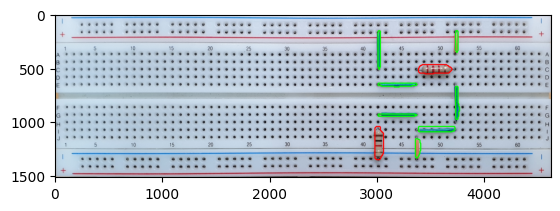

Saving 'polygons.jpg' to /result_images ...


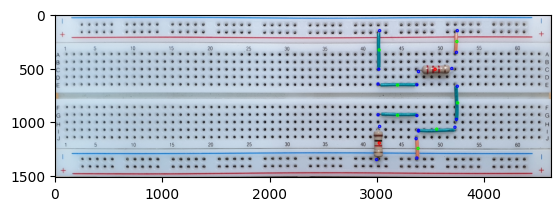

Saving 'get-pin-result.jpg' to /result_images ...


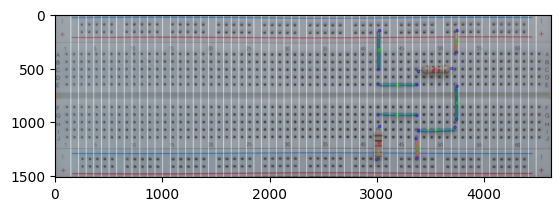

Saving 'image-grid.jpg' to /result_images ...

Detected components and their positions:
['R', ['abcde', 47], ['abcde', 52]]
['R', ['gnd'], ['fghij', 42]]
['W', ['fghij', 42], ['fghij', 47]]
['W', ['vdd'], ['abcde', 52]]
['W', ['fghij', 52], ['abcde', 52]]
['W', ['fghij', 47], ['gnd']]
['W', ['fghij', 52], ['fghij', 47]]
['W', ['vdd'], ['abcde', 42]]
['W', ['abcde', 42], ['abcde', 47]]


In [48]:
import cv2
from post_processing import get_all_element_pin, image_grid_check, draw_all_element_polygon

### Input image_name and label_path here:
image_name = 'S9'
predict_folder = 14
label_path = f'runs/segment/predict{predict_folder}/labels/{image_name}.txt'
###

original_image_path = f"test_image/{image_name}.jpg"
original_img = cv2.imread(original_image_path) # gbr
original_img = original_img[:,:,::-1] # rgb
image = original_img.copy()

# find edge
with open(label_path) as fp:
  lines = fp.readlines()

# Draw all detected polygons
draw_all_element_polygon(lines, image, show_image=True, save_image=True)

# Get all pin locations 
PINs = get_all_element_pin(lines, image, show_image=True, save_image=True)

# Show the decision boundaries with respect to the pin-detected image
image_grid_check(show_image=True, save_image=True)

# Print all 'PINs'
print("\nDetected components and their positions:")
print(*PINs, sep='\n')

### Show opened and shorted components

Opened components:



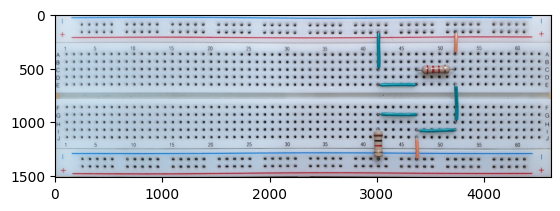

Saving 'opened-components.jpg' to /result_images ...

Shorted components:
['R', ['abcde', 47], ['abcde', 52]]
['R', ['gnd', 0], ['fghij', 42]]


In [49]:
from post_processing import find_open_component, find_short_component, draw_all_element_polygon

# Show opened components
print("Opened components:")
opened_component, N = find_open_component(PINs)
print(*opened_component, sep = "\n")
opened_lines = [line for i, line in enumerate(lines) if i in N]
draw_all_element_polygon(opened_lines, image, show_image=True ,save_image=True, filename='opened-components')

# Show shorted components
print("\nShorted components:")
short_component = find_short_component(PINs)
print(*short_component, sep = "\n")